In [2]:
import json
import pandas as pd
# Step 3 - import the datasets
df_movies = pd.read_csv('data/tmdb_5000_movies.csv')
df_credits = pd.read_csv('data/tmdb_5000_credits.csv')


In [3]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [4]:
movies = load_tmdb_movies('data/tmdb_5000_movies.csv')
credits = load_tmdb_credits('data/tmdb_5000_credits.csv')

In [5]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [6]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."


In [7]:
print(sorted(credits.cast.iloc[0][0].keys()))

['cast_id', 'character', 'credit_id', 'gender', 'id', 'name', 'order']


In [8]:
print(sorted(credits.crew.iloc[0][0].keys()))

['credit_id', 'department', 'gender', 'id', 'job', 'name']


In [9]:
[actor['name'] for actor in credits['cast'].iloc[0][:5]]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [10]:

def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

In [11]:
df =df_movies[["id" , "popularity", "budget" ,"revenue" , "title" ,"vote_count" , "vote_average"]]
df = df.rename(columns = {'id' : "movie_id"})
df

,movie_id,popularity,budget,revenue,title,vote_count,vote_average
0,19995,150.437577,237000000,2787965087,Avatar,11800,7.2
1,285,139.082615,300000000,961000000,Pirates of the Caribbean: At World's End,4500,6.9
2,206647,107.376788,245000000,880674609,Spectre,4466,6.3
3,49026,112.312950,250000000,1084939099,The Dark Knight Rises,9106,7.6
4,49529,43.926995,260000000,284139100,John Carter,2124,6.1
...,...,...,...,...,...,...,...
4798,9367,14.269792,220000,2040920,El Mariachi,238,6.6
4799,72766,0.642552,9000,0,Newlyweds,5,5.9
4800,231617,1.444476,0,0,"Signed, Sealed, Delivered",6,7.0
4801,126186,0.857008,0,0,Shanghai Calling,7,5.7


In [12]:
credits['gender_of_lead'] = credits.cast.apply(lambda x: safe_access(x, [0, 'gender']))
credits['lead'] = credits.cast.apply(lambda x: safe_access(x, [0, 'name']))
credits.head(3)

C:\Users\User\AppData\Local\Temp/ipykernel_36272/2951976599.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


,movie_id,title,cast,crew,gender_of_lead,lead
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",2.0,Sam Worthington
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",2.0,Johnny Depp
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",2.0,Daniel Craig


In [23]:
df = pd.merge(movies, credits, left_on='id', right_on='movie_id')
df['gross'] = df["revenue"] - df["budget"]
dc = df[df['gender_of_lead'] == 2.0]
da =dc[['lead','original_title', 'revenue','budget','gross', 'popularity', 'vote_count' , 'vote_average']].sort_values(by=['vote_count' , 'vote_average','popularity'], ascending=False ,ignore_index=True)
dup = da['lead'].duplicated()
da[dup].sort_values(by=['gross'],ascending=False).head(10)

,lead,original_title,revenue,budget,gross,popularity,vote_count,vote_average
15,Chris Pratt,Jurassic World,1513528810,150000000,1363528810,418.708552,8662,6.5
33,Robert Downey Jr.,Avengers: Age of Ultron,1405403694,280000000,1125403694,134.279229,6767,7.3
19,Elijah Wood,The Lord of the Rings: The Return of the King,1118888979,94000000,1024888979,123.630332,8064,8.1
12,Robert Downey Jr.,Iron Man 3,1215439994,200000000,1015439994,77.682080,8806,6.8
184,Shia LaBeouf,Transformers: Dark of the Moon,1123746996,195000000,928746996,28.529607,3299,6.1
92,Steve Carell,Despicable Me 2,970761885,76000000,894761885,136.886704,4637,7.0
201,Mark Wahlberg,Transformers: Age of Extinction,1091405097,210000000,881405097,116.840296,3095,5.8
93,Tom Hanks,Toy Story 3,1066969703,200000000,866969703,59.995418,4597,7.6
71,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest,1065659812,200000000,865659812,145.847379,5246,7.0
22,Elijah Wood,The Lord of the Rings: The Two Towers,926287400,79000000,847287400,106.914973,7487,8.0


In [14]:
def filter_row(column_name):
    new_df = da[column_name].str.cat(sep = '|')
    new_df = pd.Series(new_df.split('|'))
    counts = new_df.value_counts(ascending = False)
    return counts

In [15]:
actor = filter_row('lead')

actor = actor.head(30)

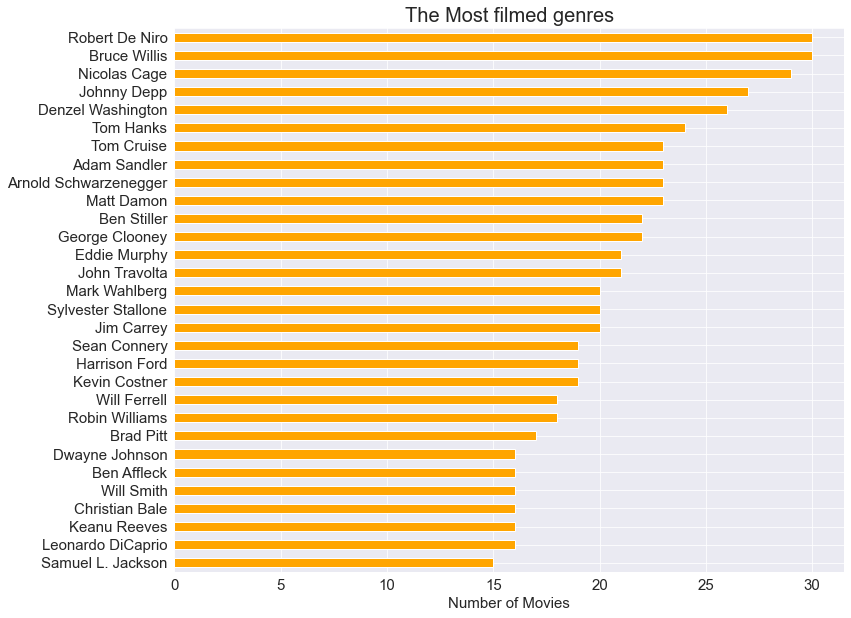

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

actor.sort_values(ascending = True, inplace = True)

#initializing plot
ax = actor.plot.barh(color = 'orange', fontsize = 15)
ax.set_title('The Most filmed genres',size =20)
ax.set_xlabel('Number of Movies', fontsize = 15)
ax.figure.set_size_inches(12, 10)
plt.show()

In [17]:
def sum_unique(s):
    return s.unique().sum()


df2 = da.groupby('lead', sort=False, as_index=False).agg(
    lead=('lead', 'first'),
    gross=('gross', sum_unique),
    popularity=('popularity', sum_unique),
)
    
df2

,lead,gross,popularity
0,Sam Worthington,2813899415,277.093061
1,Chris Pratt,2376018131,959.355104
2,Vin Diesel,2240173065,396.587157
3,Robert Downey Jr.,5073496153,798.828193
4,Elijah Wood,2892919895,462.432782
...,...,...,...
1223,Hal Scardino,-45000000,11.095914
1224,Eli Marienthal,-46840695,61.245957
1225,Garry Shandling,-60000000,2.275331
1226,Michael Jackson,-60000000,15.798622


In [18]:
da[da['lead'].duplicated() == True]

,lead,original_title,revenue,budget,gross,popularity,vote_count,vote_average
4,Robert Downey Jr.,Avengers: Age of Ultron,1405403694,280000000,1125403694,134.279229,6767,7.3
6,Robert Downey Jr.,Iron Man 3,1215439994,200000000,1015439994,77.682080,8806,6.8
16,Elijah Wood,The Lord of the Rings: The Two Towers,926287400,79000000,847287400,106.914973,7487,8.0
19,Christian Bale,The Dark Knight,1004558444,185000000,819558444,187.322927,12002,8.2
24,Daniel Radcliffe,Harry Potter and the Order of the Phoenix,938212738,150000000,788212738,78.144395,5494,7.4
...,...,...,...,...,...,...,...,...
3324,Chow Yun-fat,Dragonball Evolution,0,100000000,-100000000,21.677732,462,2.9
3325,Seth Green,Mars Needs Moms,38992758,150000000,-111007242,12.362599,199,5.5
3326,Dennis Quaid,The Alamo,25819961,145000000,-119180039,10.660441,106,5.8
3327,Benicio del Toro,The Wolfman,0,150000000,-150000000,21.214571,549,5.5


In [19]:
da['movies'] = da['popularity'] + da['gross'] + da['vote_average']
da = da.sort_values(by=['movies'],ascending=False)
da

,lead,original_title,revenue,budget,gross,popularity,vote_count,vote_average,movies
0,Sam Worthington,Avatar,2787965087,237000000,2550965087,150.437577,11800,7.2,2.550965e+09
1,Chris Pratt,Jurassic World,1513528810,150000000,1363528810,418.708552,8662,6.5,1.363529e+09
2,Vin Diesel,Furious 7,1506249360,190000000,1316249360,102.322217,4176,7.3,1.316249e+09
3,Robert Downey Jr.,The Avengers,1519557910,220000000,1299557910,144.448633,11776,7.4,1.299558e+09
4,Robert Downey Jr.,Avengers: Age of Ultron,1405403694,280000000,1125403694,134.279229,6767,7.3,1.125404e+09
...,...,...,...,...,...,...,...,...,...
3324,Chow Yun-fat,Dragonball Evolution,0,100000000,-100000000,21.677732,462,2.9,-9.999998e+07
3325,Seth Green,Mars Needs Moms,38992758,150000000,-111007242,12.362599,199,5.5,-1.110072e+08
3326,Dennis Quaid,The Alamo,25819961,145000000,-119180039,10.660441,106,5.8,-1.191800e+08
3327,Benicio del Toro,The Wolfman,0,150000000,-150000000,21.214571,549,5.5,-1.500000e+08


In [20]:
list1=[]
for i in da['lead']:
    list1.extend(i)
list1 = pd.Series(list1)
list1 = list1.value_counts()[:15].sort_values(ascending=True)

In [35]:
df_geners_profit=da.groupby(['lead' ],as_index=False)['popularity'].sum().sort_values(by=['popularity'] , ascending =False)
df_geners_profit.head(10)

,lead,popularity
604,Johnny Depp,1553.512432
1147,Tom Hanks,1292.662015
1142,Tom Cruise,1135.042664
143,Bruce Willis,1071.252201
784,Matthew McConaughey,999.437483
708,Leonardo DiCaprio,986.052821
66,Arnold Schwarzenegger,978.416787
193,Chris Pratt,959.355104
199,Christian Bale,953.581253
773,Matt Damon,874.134382


In [ ]:
da[da.lead == 'Bruce Willis']
        